In [55]:
import numpy as np
import matplotlib.pyplot as pyplot
import scipy
import qiskit as qk

from qiskit.providers.aer.noise import NoiseModel
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
qreg = qk.QuantumRegister(3,'qreg')
creg = qk.ClassicalRegister(1,'creg')
swap_test_circuit = qk.QuantumCircuit(qreg,creg)

swap_test_circuit.h(0)
# init phi state to be +
swap_test_circuit.h(2)


swap_test_circuit.cswap(0, 1, 2)
swap_test_circuit.h(0)

swap_test_circuit.measure(qreg[0],creg[0])

In [45]:
print(swap_test_circuit)

        ┌───┐   ┌───┐┌─┐
qreg_0: ┤ H ├─■─┤ H ├┤M├
        └───┘ │ └───┘└╥┘
qreg_1: ──────X───────╫─
        ┌───┐ │       ║ 
qreg_2: ┤ H ├─X───────╫─
        └───┘         ║ 
creg: 1/══════════════╩═
                      0 


In [46]:
backend = qk.Aer.get_backend('qasm_simulator')
#noise_model = NoiseModel.from_backend(backend)
#backend = qiskit.QasmSimulator(method='density_matrix', noise_model=noise_model)

In [49]:
n_shots = 1000
# job = backend.run(circ, shots=1000) # repeat the experiment 1000 times
job = qk.execute(swap_test_circuit, backend=backend,shots=n_shots)
result = job.result()

In [50]:
result.get_counts()

{'0': 745, '1': 255}

In [51]:
print("P(0) = ", result.get_counts()['0']/n_shots)

P(0) =  0.745


In [89]:
def get_noisy_results(p_error):
    # Create an empty noise model
    noise_model = NoiseModel()

    # Add depolarizing error to all single qubit u1, u2, u3 gates
    error = depolarizing_error(p_error, 1)
    noise_model.add_all_qubit_quantum_error(error, ['h'])

    basis_gates = noise_model.basis_gates

    # Print noise model info
    #print(noise_model)

    n_shots = 5000
    # job = backend.run(circ, shots=1000) # repeat the experiment 1000 times
    job = qk.execute(swap_test_circuit, backend=backend,shots=n_shots, basis_gates = basis_gates, noise_model = noise_model)
    noisy_results = job.result()

    #print(noisy_results.get_counts())
    return noisy_results.get_counts()['0']/n_shots

In [90]:
print( get_noisy_results(0.05) )

0.7244


In [93]:
xrange = np.linspace(0, 1, 20)
noisy_prob_0 = []
for p in xrange:
    #print( get_noisy_results(p) )
    noisy_prob_0.append( get_noisy_results(p) )

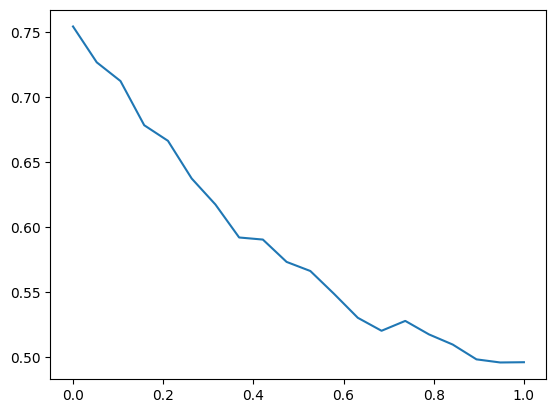

In [94]:
pyplot.plot(xrange, noisy_prob_0)